In [9]:

from netCDF4 import Dataset # typical python libaray for open netcdf file 
import numpy as np # typical python libaray for array operation 
import matplotlib.pyplot as plt  # typical python libaray for plotting
import cartopy.crs as ccrs # typical python libaray for plotting coastlines, maps
import cartopy.feature as cfeature

In [10]:
# Open the NetCDF file, change the file path to your own file path
# file_path = '/media/august/16T/XS_student/3B-DAY.MS.MRG.3IMERG.20000601-S000000-E235959.V07B.nc4' 
file_path = './3B-DAY.MS.MRG.3IMERG.20000601-S000000-E235959.V07B.nc4'

#B-DAY: This indicates the data product is a daily product, specifically from the 3B suite of IMERG products.
# 20000601: The date the data covers, in this case, June 1, 2000.
#nc4: The file format, which is NetCDF4, a format commonly used for storing multidimensional scientific data.

data = Dataset(file_path)
# List all variables in the file
print(data.variables.keys())

# precipitation: This key contains the main precipitation data, typically in units like millimeters representing the daily amount of rainfall 
# time: This represents the time dimension, typically in hours or days, corresponding to the data’s temporal resolution.
#lon: This represents the longitude array for the grid, indicating the longitudes of the data points.
#lat: This represents the latitude array for the grid, indicating the latitudes of the data points.

dict_keys(['precipitation', 'precipitation_cnt', 'precipitation_cnt_cond', 'MWprecipitation', 'MWprecipitation_cnt', 'MWprecipitation_cnt_cond', 'randomError', 'randomError_cnt', 'probabilityLiquidPrecipitation', 'lon', 'lat', 'time', 'time_bnds'])


In [19]:
# acess the variables
precip = data.variables['precipitation'][0,:,:]
lat = data.variables['lat'][:]
lon = data.variables['lon'][:]

In [12]:
print(lat.shape) #  lat has array size of 1800
print(lat) # latitude ranges from -90 to 90, with resolution of 0.1

print(lon.shape) #  lon has array size of 3600
print(lon) # longitude ranges from -180 to 180, with resolution of 0.1

print(precip.shape) #precipitation has arrray shape of (3600, 1800), covering the global domain.

(1800,)
[-89.95 -89.85 -89.75 ...  89.75  89.85  89.95]
(3600,)
[-179.95 -179.85 -179.75 ...  179.75  179.85  179.95]
(3600, 1800)


In [22]:
# `precip` is your precipitation data array and `lat`, `lon` are the coordinates
# Create meshgrid for lat and lon
lon_2d, lat_2d = np.meshgrid(lon, lat)
print(lon_2d.shape)
print(lat_2d.shape)
# Assuming precip is (3600, 1800) array
precip_transposed = np.transpose(precip)
print(precip_transposed.shape)  # Should output (1800, 3600)

(1800, 3600)
(1800, 3600)
(1800, 3600)


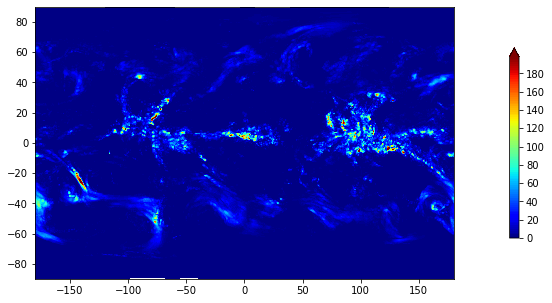

In [14]:
fig, ax = plt.subplots(figsize=(10, 5))
# Create contour plot
precipitation_levels = np.arange(0,200,2)
precip_contour=ax.contourf(lon_2d, lat_2d,precip_transposed , levels=precipitation_levels, cmap='jet',extend='max')
# Add color bar
cbar = fig.colorbar(precip_contour, ax=ax, orientation='vertical', shrink=0.7, pad=0.1)

C:\Users\calvi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


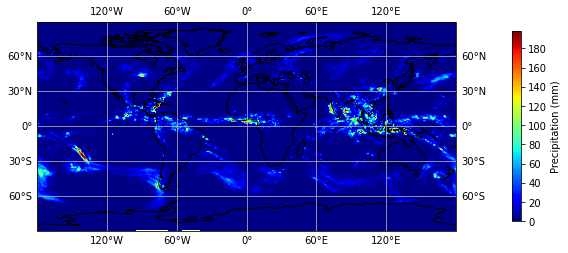

In [15]:
# now we add the global map to our domain of interest

# Set up the map projection and figure
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw={'projection': ccrs.PlateCarree()})

# Create contour plot
precipitation_levels = np.arange(0,200,2)
contour = ax.contourf(lon_2d, lat_2d, precip_transposed, levels=precipitation_levels, cmap='jet')
# Add color bar
cbar = fig.colorbar(contour, ax=ax, orientation='vertical', shrink=0.7, pad=0.1)
cbar.set_label('Precipitation (mm)')  # Label for color bar

# Additional map features
ax.coastlines()
ax.gridlines(draw_labels=True)

plt.show()

0.895


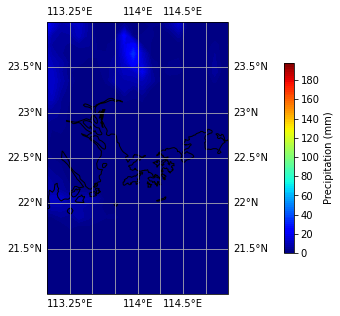

In [24]:
#the code are the same, except we use 'set_extent' to zoom into the Hong Kong region
lat_min, lat_max = 21, 24
lon_min, lon_max = 113, 115

hongkong = precip_transposed[210:240,1130:1150]
maxHongkong = np.ma.max(hongkong)
print(maxHongkong)


# Set up the map projection and figure
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw={'projection': ccrs.PlateCarree()})

##### set_extent to zoom into the Hong Kong region
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Create contour plot
precipitation_levels = np.arange(0,200,2)
contour = ax.contourf(lon_2d, lat_2d, precip_transposed, levels=precipitation_levels, cmap='jet')

# Add color bar
cbar = fig.colorbar(contour, ax=ax, orientation='vertical', shrink=0.7, pad=0.1)
cbar.set_label('Precipitation (mm)')  # Label for color bar

ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Additional map features
ax.coastlines()
ax.gridlines(draw_labels=True)

plt.show()

ax.coastlines()


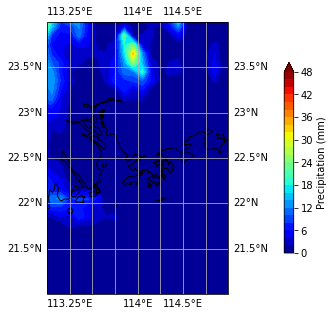

In [17]:
# notice the precipitation is all in blue, we can adjust the coutour levels 


# now we add the global map to our domain of interest

# Set up the map projection and figure
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw={'projection': ccrs.PlateCarree()})

# Create contour plot

# define coutour levels, for example precipitation ranging from 0, 50, with space of 2
precipitation_levels = np.arange(0,50,2)
contour = ax.contourf(lon_2d, lat_2d, precip_transposed, levels=precipitation_levels, cmap='jet',extend='max')

# set_extent to zoom into the Hong Kong region
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Add color bar
cbar = fig.colorbar(contour, ax=ax, orientation='vertical', shrink=0.7, pad=0.1)
cbar.set_label('Precipitation (mm)')  # Label for color bar

# Additional map features
ax.coastlines()
ax.gridlines(draw_labels=True)

plt.show()
